In [23]:
# import relevant modules/packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

In [24]:
# read data
Data=pd.read_csv("DataInputFinal.csv")

In [25]:
Data.head(3)

,Unnamed: 0,NTA_name,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.40,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.0,11
1,1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.19,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.0,44
2,2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.29,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.0,26


In [26]:
X = Data.iloc[:,3:]  # all input features are percentages
y = Data.iloc[:, [2]] # adult asthma hospitalization rate

In [27]:
# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [40]:
# parameter selection and model fitting
param_grid ={'max_depth':range(1,16)}
rf=RandomForestRegressor(n_estimators=100)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
y_predict = rs.predict(X_test)
print('Best parameter value:',rs.best_params_)

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarnin

Best parameter value: {'max_depth': 10}


In [ ]:
# note that each run returns a slightly different optimal RF in terms of optimal branch depth, performance metrics, and feature importances
# top features were consistently demographic
# IS and OS hovers around 97% and 89%

In [41]:
# evaluation
print('IS Accuracy = ', rs.score(X_train, y_train))
print('OS Accuracy = ', rs.score(X_test, y_test))
# alternatively: print('OS Accuracy = ', (y_predict == y_test).value_counts(normalize=True)[True])

IS Accuracy =  0.9683903601807953
OS Accuracy =  0.8849478022190138


In [42]:
# MSE
mean_squared_error(y_test, y_predict)

41.305492799735944

In [43]:
# r2 score
r2_score(y_test, y_predict)

0.8849478022190138

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


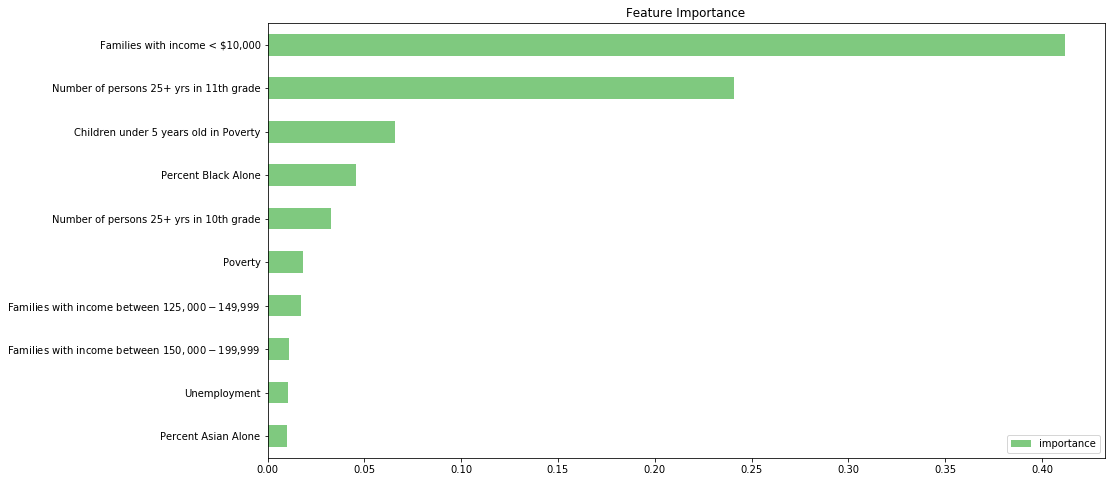

In [44]:
# feature importance plot
rf_optimal=RandomForestRegressor(n_estimators=100, max_depth = 10).fit(X_train,y_train)
df_feat_importance = pd.DataFrame({'importance' : rf_optimal.feature_importances_}, index = X.columns)
df_feat_importance.sort_values(by='importance', ascending=True ).tail(10).plot(kind='barh', title = 'Feature Importance',colormap ='Accent', figsize=(15,8))

In [45]:
# feature importance table
df = pd.DataFrame({'importance' : rf_optimal.feature_importances_}, index = X.columns)
df.sort_values(by='importance', ascending=False)

,importance
"Families with income < $10,000",0.411661
Number of persons 25+ yrs in 11th grade,0.241092
Children under 5 years old in Poverty,0.065918
Percent Black Alone,0.045686
Number of persons 25+ yrs in 10th grade,0.033034
...,...
"Workers 16 years and over in production, transport, material moving",0.000635
Persons 3 years and over graduate or professional school,0.000616
tree_dbh,0.000448
"Workers 16+ years in management, business, science,arts occupations",0.000361
